In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [2]:
dfsum = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
dfsum
year_dfsum = dfsum.query("avg_casa_balance_1Y > 0")




,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.00,0.0,0.0000,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.00,0.0,3272.9367,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.00,0.0,6249.7550,6,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,854.670000,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.00,0.0,14354.9370,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.00,0.0,91511.7691,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,57,F,<100,97,0.0,0.0,0.00,1247018.0,0.8800,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,13775.933155
49996,58,F,Mega,34,0.0,0.0,0.00,1000000.0,0.0000,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,8247.466438
49997,34,М,1M+,21,0.0,0.0,0.00,0.0,6450.9300,73,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,1621.347671,0.179949,1973.128710
49998,43,М,<100,52,0.0,0.0,39318.52,0.0,4101.1200,0,...,39318.52,48453.57,63442.406667,0.0,0.0,0.0,NaN,NaN,NaN,5101.543269


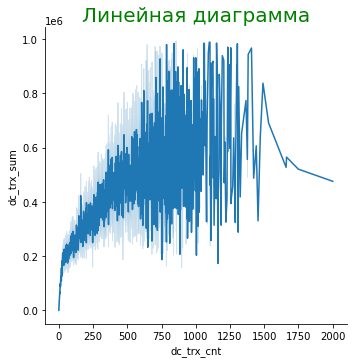

In [3]:
sns.relplot(
    x='dc_trx_cnt',
    y='dc_trx_sum',
    data=year_dfsum.query("dc_trx_sum < 1000000"),
    kind='line'
)
plt.title('Линейная диаграмма', size=20, color='g');

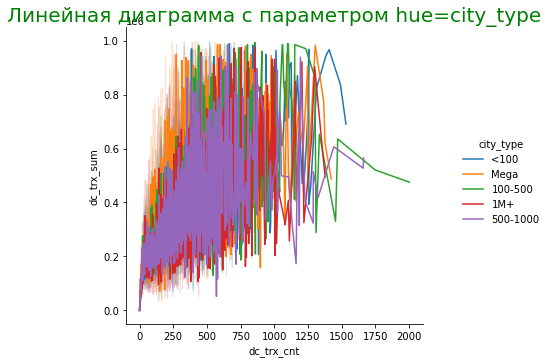

In [4]:
cnt_city = ['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.relplot(
    x='dc_trx_cnt',
    y='dc_trx_sum',
    hue='city_type',
    hue_order=cnt_city,
    data=year_dfsum.query("dc_trx_sum < 1000000"),
    kind='line'
)
plt.title('Линейная диаграмма с параметром hue=city_type', size=20, color='g');


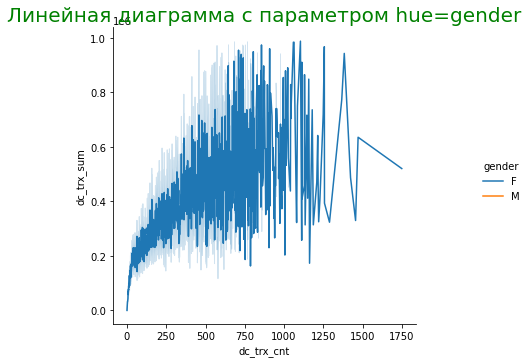

In [5]:
sns.relplot(x='dc_trx_cnt',
            y='dc_trx_sum',
            hue='gender',
            hue_order=["F", "M"],
            data=year_dfsum.query("dc_trx_sum < 1000000"),
            kind='line')
plt.title('Линейная диаграмма c параметром hue=gender', size=20, color='g');

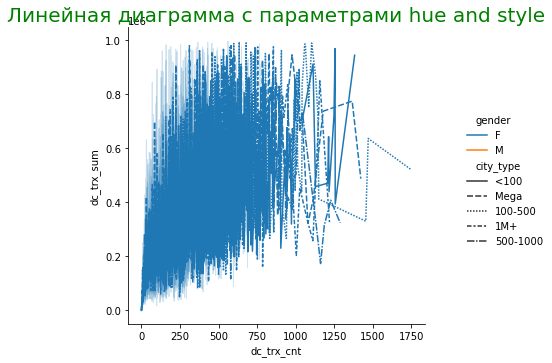

In [6]:
sns.relplot(
    x='dc_trx_cnt',
    y='dc_trx_sum',
    hue='gender',
    hue_order=["F", "M"],
    style='city_type',
    style_order=['<100', 'Mega', '100-500', '1M+', '500-1000'],
    data=year_dfsum.query("dc_trx_sum < 1000000"),
    kind='line')
plt.title('Линейная диаграмма c параметрами hue and style', size=20, color='g')

plt.show();

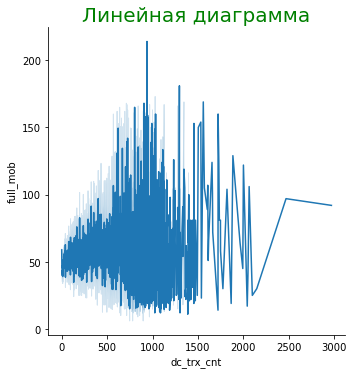

In [7]:
sns.relplot(
    x='dc_trx_cnt',
    y='full_mob',
    data=year_dfsum,
    kind='line')
plt.title('Линейная диаграмма', size=20, color='g');

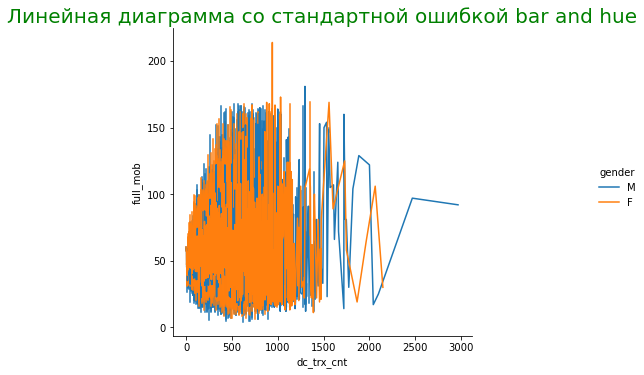

In [8]:
sns.relplot(
    x='dc_trx_cnt',
    y='full_mob',
    hue='gender',
    data=year_dfsum,
    kind='line',
    err_style="bars",
    ci=99)   # Standard Errors
plt.title('Линейная диаграмма со стандартной ошибкой bar and hue', size=20, color='g');

Text(0.5, 1.0, 'Линейная диаграмма с параметрами hue и style')

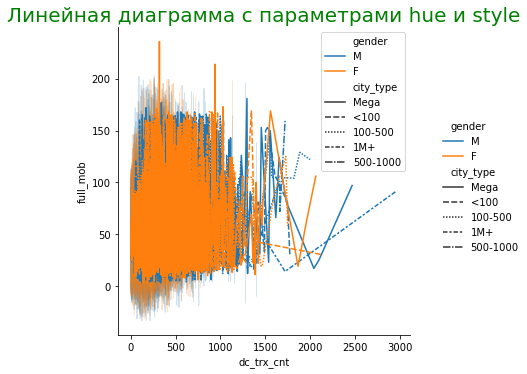

In [9]:
sns.relplot(
    x='dc_trx_cnt',
    y='full_mob',
    hue='gender',
    style='city_type',
    kind='line',
    ci='sd',
    data=year_dfsum)
plt.title('Линейная диаграмма с параметрами hue и style', size=20, color='g');
plt.legend()

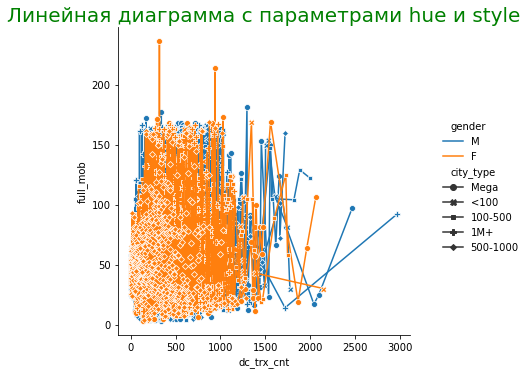

In [10]:
sns.relplot(
    x='dc_trx_cnt',
    y='full_mob',
    hue='gender',
    style='city_type',
    dashes=False,
    markers=True,
    data=year_dfsum,
    kind='line',
    ci=None)
plt.title('Линейная диаграмма с параметрами hue и style', size=20, color='g');

In [11]:
long_dfsum = pd.melt(year_dfsum, var_name='acc_type', value_name='summ',
            id_vars=['age', 'gender', 'city_type', 'full_mob', 'dc_trx_cnt', 'dc_trx_sum', 'income', 'min_casa_balance_1q', 'max_casa_balance_1q', 'avg_casa_balance_1Y', 'min_td_balance_1q', 'max_td_balance_1q', 'avg_td_balance_1Y', 'min_loan_balance_1q', 'max_loan_balance_1q', 'avg_loan_balance_1Y', 'min_cl_balance_1q', 'max_cl_balance_1q', 'avg_cl_balance_1Y', 'loan_to_deposit', 'Avg_trx', 'avgtrx_to_balance', 'nbi'])
long_dfsum.shape
long_dfsum.sample(n=100)

(232815, 25)

,age,gender,city_type,full_mob,dc_trx_cnt,dc_trx_sum,income,min_casa_balance_1q,max_casa_balance_1q,avg_casa_balance_1Y,...,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,acc_type,summ
112206,29,F,100-500,82,60,163722.01000,0.00,826.760,3152.2000,5073.315833,...,0.000000,0.00,0.00,0.000000,0.0,2728.700167,0.537853,1599.241424,loan_balance_0m,0.00
207111,37,М,500-1000,5,266,163602.51000,41352.43,0.000,0.0000,746.415000,...,1300.968333,0.00,3085.86,1300.968333,NaN,615.047030,0.824001,116.774646,casa_balance_0m,0.00
124428,53,М,Mega,81,4,223482.36263,0.00,66605.344,70001.0908,58518.952808,...,0.000000,0.00,0.00,0.000000,NaN,55870.590658,0.954744,2065.887423,loan_balance_0m,0.00
163936,30,F,100-500,50,34,248800.00000,21136.00,22.700,1744.5200,461.094167,...,0.000000,0.00,0.00,0.000000,NaN,7317.647059,15.870179,NaN,td_balance_0m,0.00
149756,50,М,Mega,95,320,547237.69000,40075.77,17940.700,48092.2400,26414.165833,...,552708.765000,597433.34,616913.09,552708.765000,NaN,1710.117781,0.064742,35856.211756,td_balance_0m,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126366,39,F,1M+,29,0,0.00000,0.00,0.040,0.0400,0.040000,...,0.000000,0.00,0.00,0.000000,NaN,NaN,NaN,70.083333,loan_balance_0m,0.00
142421,26,F,Mega,24,0,0.00000,0.00,593.210,593.2100,593.210000,...,0.000000,0.00,0.00,0.000000,NaN,NaN,NaN,22.299917,td_balance_0m,0.00
92957,46,М,500-1000,33,216,197805.10000,15973.80,10.860,10234.4200,923.304167,...,0.000000,0.00,0.00,0.000000,NaN,915.764352,0.991834,214.302703,cl_balance_0m,0.00
27872,28,F,1M+,10,0,0.00000,0.00,0.000,1.6300,60423.023636,...,0.000000,0.00,0.00,0.000000,NaN,NaN,NaN,1834.766487,ml_balance,0.00


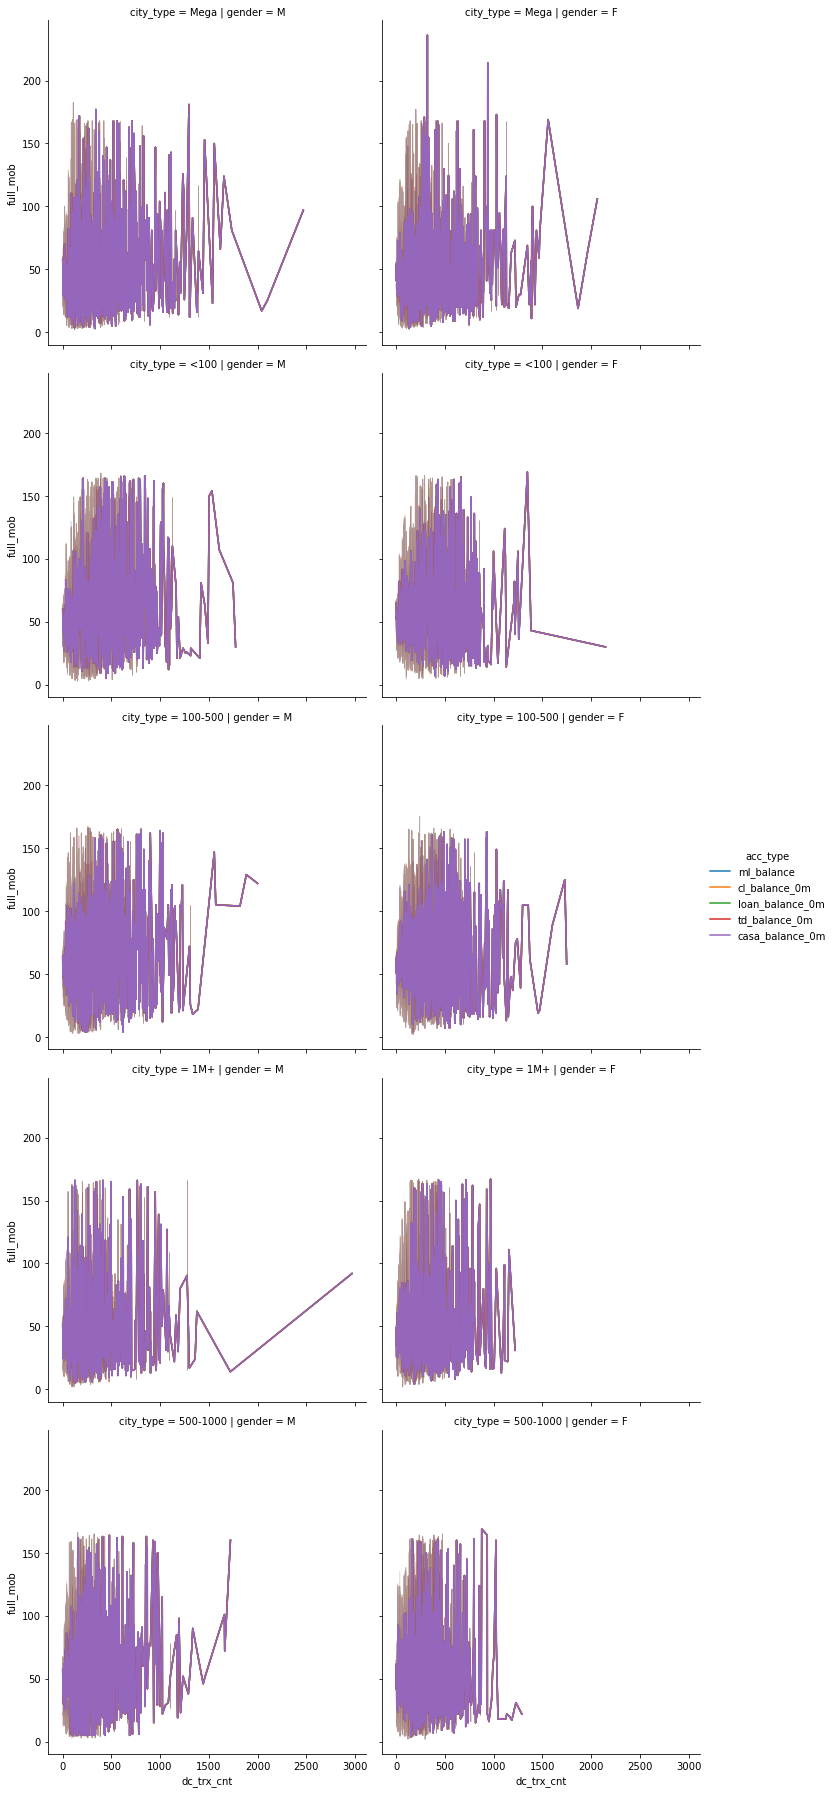

In [12]:
g = sns.relplot(
    x='dc_trx_cnt',
    y='full_mob',
    data=long_dfsum,
    kind='line',
    hue='acc_type',
    row='city_type',
    col='gender')

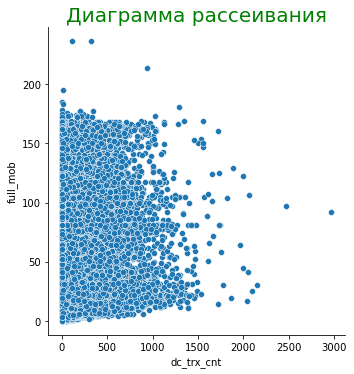

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(
    x='dc_trx_cnt',
    y='full_mob',
    data=year_dfsum,
#     kind='scatter'
#     kind='line'
)
plt.title('Диаграмма рассеивания', size=20, color='g');

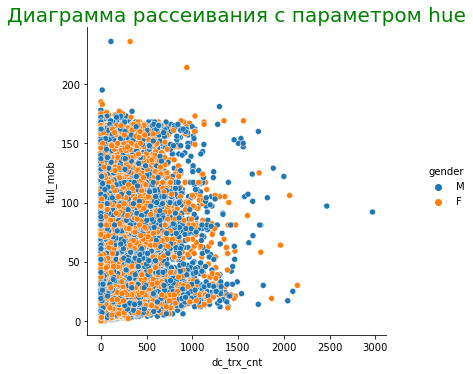

In [14]:
sns.relplot(
    x='dc_trx_cnt',
    y='full_mob',
    hue='gender',
    data=year_dfsum)
plt.title('Диаграмма рассеивания с параметром hue', size=20, color='g');

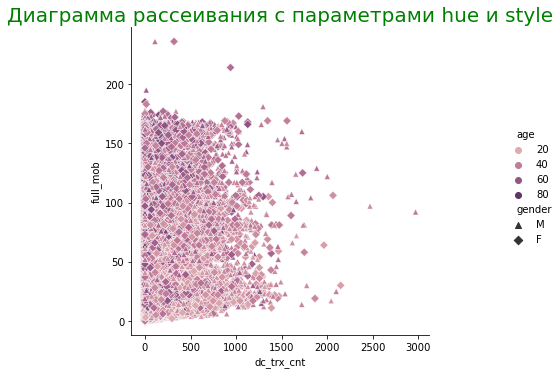

In [15]:
sns.relplot(
    x='dc_trx_cnt',
    y='full_mob',
    hue='age',
    style='gender',
    markers=['^', 'D'],
    data=year_dfsum)
plt.title('Диаграмма рассеивания с параметрами hue и style', size=20, color='g');

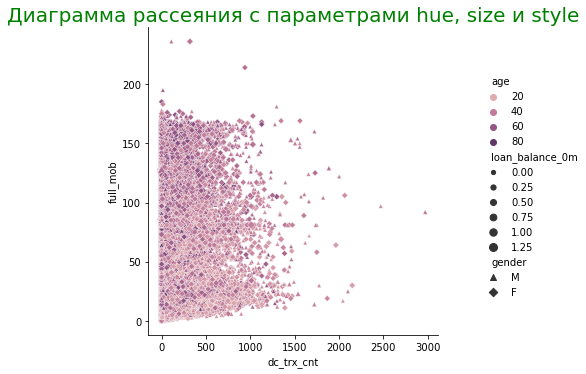

In [16]:
sns.relplot(
    x='dc_trx_cnt',
    y='full_mob',
    hue='age',
    style='gender',
    size='loan_balance_0m',
    markers=['^', 'D'],
    data=year_dfsum)

plt.title('Диаграмма рассеяния с параметрами hue, size и style', size=20, color='g');

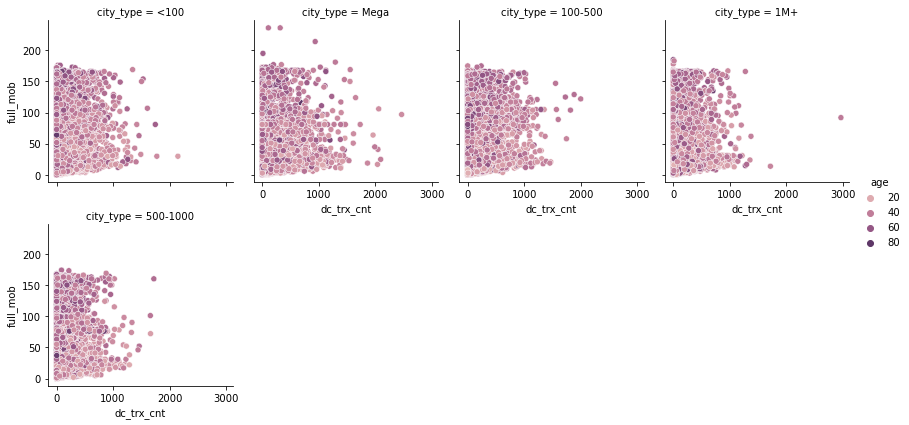

In [17]:
cnt_city = ['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.relplot(
    x='dc_trx_cnt',
    y='full_mob',
    hue='age',
    col='city_type',
    col_wrap=4,
    col_order=cnt_city,
    data=year_dfsum,
    height=3
);

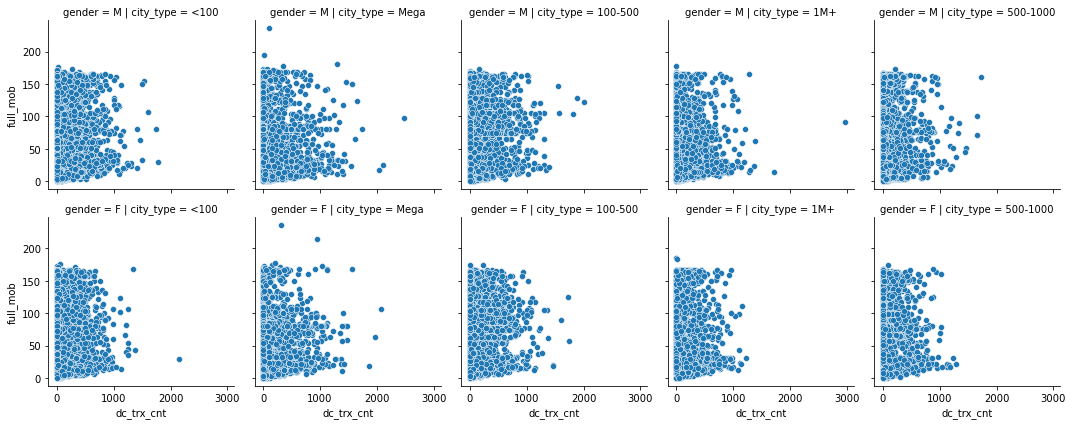

In [18]:
sns.relplot(
    x='dc_trx_cnt',
    y='full_mob',
    col='city_type',
    col_order=cnt_city,
    row='gender',
    row_order=['М', 'F'],
    data=year_dfsum,
    height=3);

In [19]:
###Категорийные диаграммы, sns.catplot()
-stripplot() and swarmplot()
-boxplot() and boxnplot()
-barplot() and countplot()
-violinplot()
-pointplot()

*stripplot(), kind=‘strip’
*swarmplot(), kind=‘swarm’

SyntaxError: cannot assign to function call (Temp/ipykernel_652/1379771898.py, line 8)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
sns.set(style="ticks", color_codes=True)

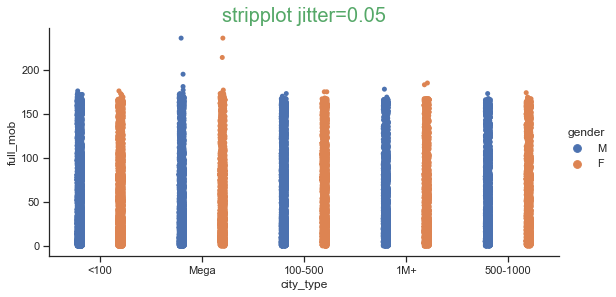

In [22]:
cnt_city = ['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.catplot(
    x='city_type',
    y='full_mob',
    data=year_dfsum,
    hue='gender',    # оба на одном графике разными цветами
    order=cnt_city,
    jitter=0.05,
    height=4,
    aspect=2,
    kind='strip',
    dodge=True)
# Можно использовать dodge=True чтобы не накладывать показатели друг на друга, а выстроить рядом друг с другом
plt.title('stripplot jitter=0.05', size=20, color='g');

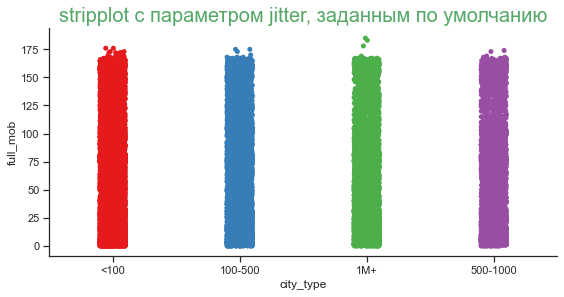

In [23]:
sns.catplot(
    x='city_type',
    y='full_mob',
    data=year_dfsum.query("city_type != 'Mega'"),
    order=['<100', '100-500', '1M+', '500-1000'],
    palette='Set1',
#     jitter=False, выстраивает все точки в линию
    height=4,
    aspect=2);

plt.title('stripplot с параметром jitter, заданным по умолчанию', size=20, color='g');

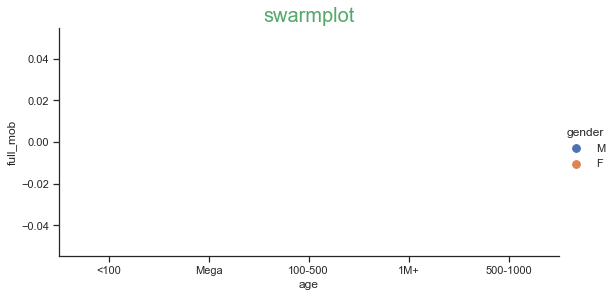

In [24]:
sns.catplot(
    x='age',
    y='full_mob',
    data=year_dfsum,
    order=cnt_city,
    hue='gender',
    kind='swarm',
    height=4,
    aspect=2)
plt.title('swarmplot', size=20, color='g');
#UserWarning: 92.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.  warnings.warn(msg, UserWarning)

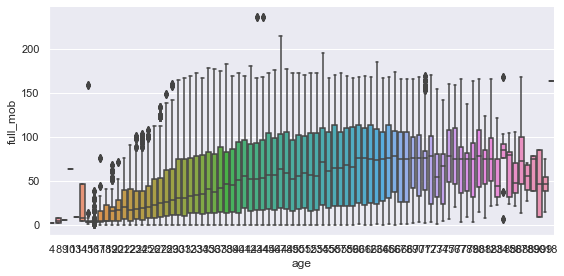

In [25]:
sns.set(style='darkgrid')
cnt_city = ['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.catplot(
    x='age',
    y='full_mob',
    data=long_dfsum,
    kind='box',
    height=4,
    aspect=2
);

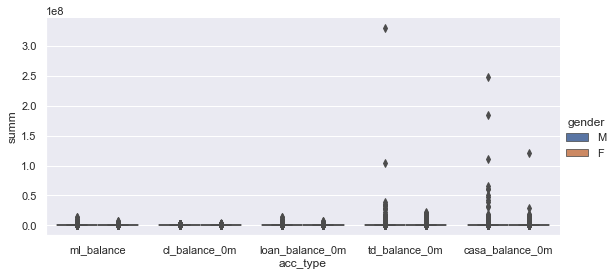

In [26]:
sns.catplot(
    x='acc_type',
    y='summ',
    data=long_dfsum,
    kind='box',
    hue='gender',
    height=4,
    aspect=2);

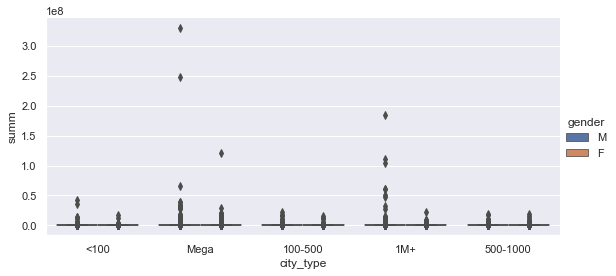

In [27]:
sns.catplot(
    x='city_type',
    y='summ',
    data=long_dfsum,
    kind='box',
    hue='gender',
    order=cnt_city,
    height=4,
    aspect=2);

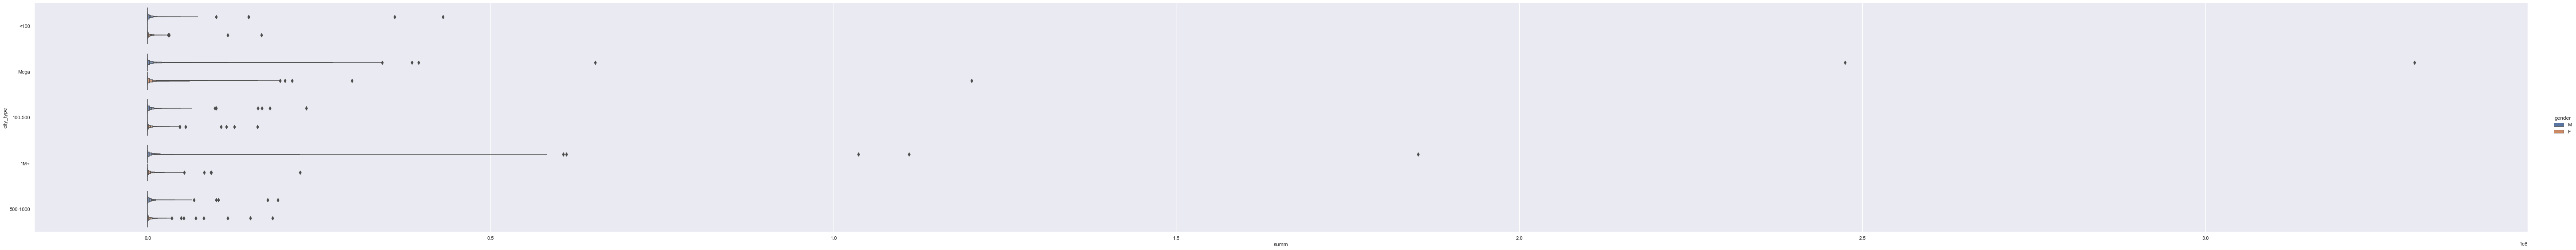

In [28]:
sns.catplot(
    x='summ',
    y='city_type',
    data=long_dfsum,
    kind='boxen',
    hue='gender',
    order=cnt_city,
    height=8,
    aspect=10);

In [29]:
from numpy import median

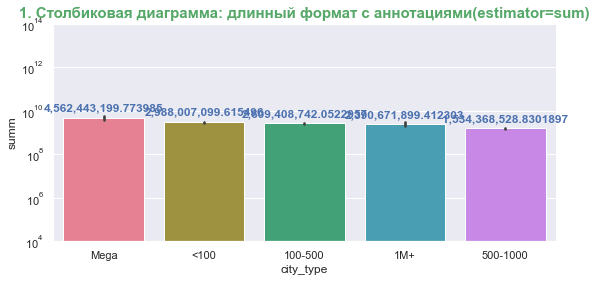

In [30]:
plt.figure(figsize=(9,4))
b = sns.barplot(
    x='city_type',
    y='summ',
    data=long_dfsum,
    estimator=sum,
    palette='husl')

b.set(yscale='log', ylim=[10000, 100000000000000])
sns.despine()

for bar in b.patches:
    b.annotate(
        "{:,}".format(bar.get_height()),
        (bar.get_x()+bar.get_width()/2.,
        bar.get_height()),
        ha='center',
        va='center',
        xytext=(0,10),
        textcoords='offset points',
        color='b',
        weight='bold'
    )

plt.title('1. Столбиковая диаграмма: длинный формат с аннотациями(estimator=sum)', size=15, color='g',
          weight='bold');

In [31]:
sns.catplot(
    data=year_dfsum,
    kind='bar',
    height=4,
    aspect=2,
    order=['<100', '100-500', '1M+', '500-1000'],
    palette="Set1"
)
plt.title('2. Столбиковая диаграмма: Широкий формат таблицы с предопределенной палитрой цветов', size=15, color='g',
          weight='bold');

KeyError: "None of [Index(['<100', '100-500', '1M+', '500-1000'], dtype='object')] are in the [columns]"

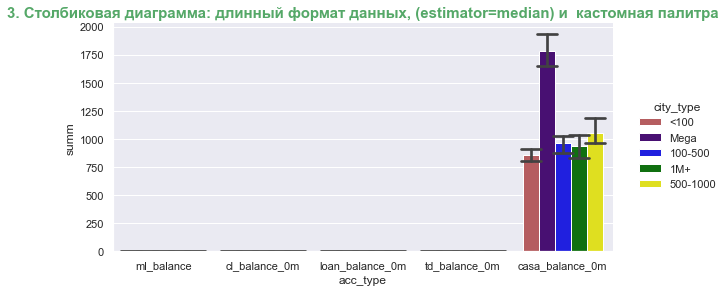

In [43]:
sns.catplot(
    x='acc_type',
    y='summ',
    data=long_dfsum,
    kind='bar',
    hue='city_type',
    hue_order=['<100', 'Mega', '100-500', '1M+', '500-1000'],
    palette={"<100": "r", "Mega": "indigo", "100-500": "blue", "1M+": "green", "500-1000": "yellow"},
    estimator=median,
    capsize=0.2,
    height=4,
    aspect=2)

plt.title('3. Столбиковая диаграмма: длинный формат данных, (estimator=median) и  кастомная палитра',
          size=15,
          color='g',
          weight='bold');


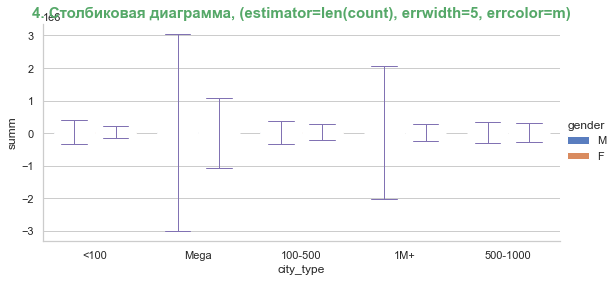

In [83]:
cnt_city = ['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.catplot(
    x='city_type',
    y='summ',
    data=long_dfsum,
    kind='bar',
    hue='gender',
    ci='sd',
    estimator=len,
    capsize=0.25,
    errcolor='m',
    errwidth=1,
    hue_order=['М','F'],
    palette="muted",
    order=cnt_city,
    height=4,
    aspect=2);
plt.title('4. Столбиковая диаграмма, (estimator=len(count), errwidth=5, errcolor=m)',
          size=15,
          color='g',
          weight='bold'
         );

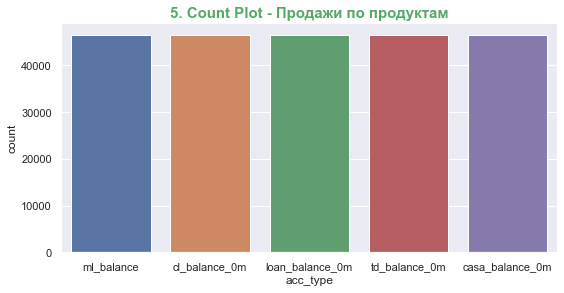

In [38]:
sns.catplot(x='acc_type',
            data=long_dfsum,
            kind='count',
            height=4,
            aspect=2
           );  # long form data frame
plt.title('5. Count Plot - Суммы по типам счетов', size=15, color='g', weight='bold');

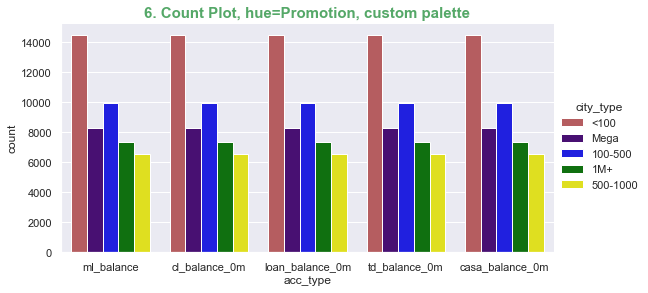

In [40]:
sns.catplot(
    x='acc_type',
    data=long_dfsum,
    kind='count',
    hue='city_type',
    hue_order=['<100', 'Mega', '100-500', '1M+', '500-1000'],
    palette={"<100": "r", "Mega": "indigo", "100-500": "blue", "1M+": "green", "500-1000": "yellow"},
    height=4,
    aspect=2);
plt.title('6. Count Plot, hue=city_type, custom palette', size=15, color='g', weight='bold');

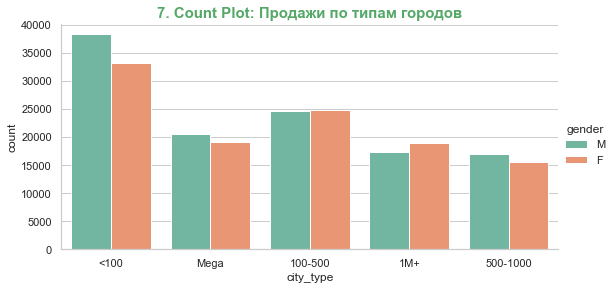

In [82]:
sns.catplot(
    x='city_type',
    data=long_dfsum,
    kind='count',
    hue='gender',
    hue_order=['М','F'],
    palette="Set2",
    order=cnt_city,
    height=4,
    aspect=2);
plt.title('7. Count Plot: Продажи по типам городов', size=15, color='g', weight='bold');

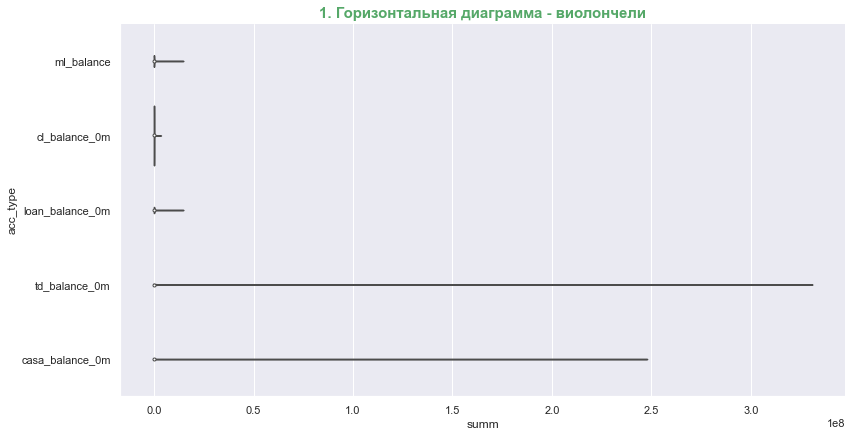

In [53]:
sns.catplot(
    x='summ',
    y='acc_type',
    data=long_dfsum,
    kind='violin',
    height=6,
    aspect=2)
plt.title('1. Горизонтальная диаграмма - виолончели', size=15, color='g', weight='bold');

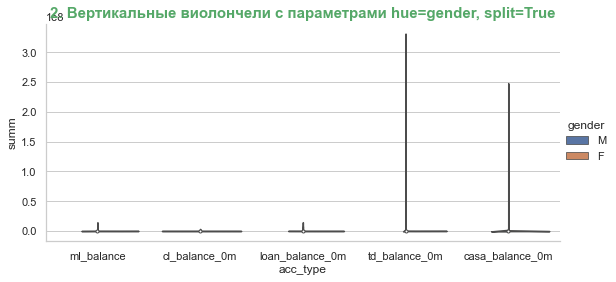

In [81]:
sns.catplot(
    x='acc_type',
    y='summ',
    data=long_dfsum,
    kind='violin',
    hue='gender',
    hue_order=["М", "F"],
    split=True,
    height=4,
    aspect=2)

plt.title('2. Вертикальные виолончели с параметрами hue=gender, split=True', size=15, color='g', weight='bold');

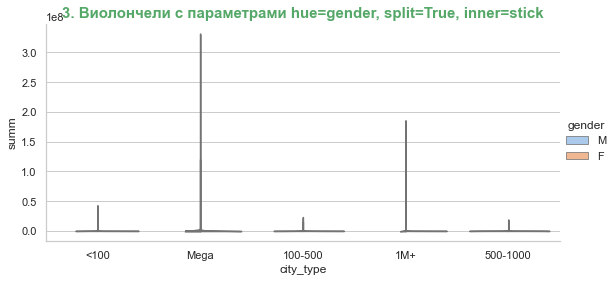

In [80]:
cnt_city = ['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.catplot(
    x='city_type',
    y='summ',
    data=long_dfsum,
    kind='violin',
    order=cnt_city,
    hue='gender',
    hue_order=["М", "F"],
    split=True,
    inner="stick",
    palette="pastel",
    height=4,
    aspect=2)
plt.title('3. Виолончели с параметрами hue=gender, split=True, inner=stick', size=15, color='g', weight='bold');

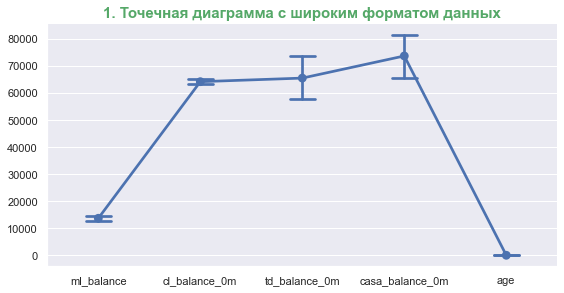

In [58]:
sns.catplot(
    data=year_dfsum,
    kind='point',
    ci=68,
    capsize=0.25,
    height=4,        # wide form df
    aspect=2,
    order=['ml_balance', 'cl_balance_0m', 'td_balance_0m', 'casa_balance_0m','age']
)
plt.title('1. Точечная диаграмма с широким форматом данных', size=15, color='g', weight='bold');

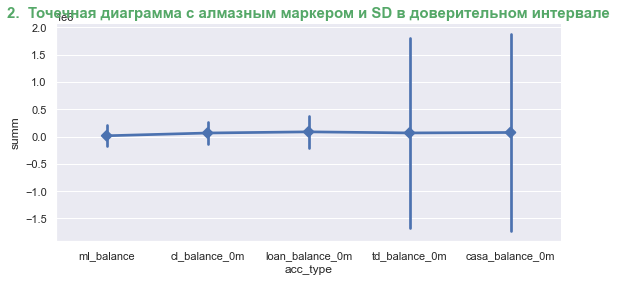

In [60]:
sns.catplot(
    x='acc_type',
    y='summ',
    data=long_dfsum, # long form data frame
    kind='point',
    markers='D',
    ci='sd',
    height=4,
    aspect=2)
plt.title('2.  Точечная диаграмма с алмазным маркером и SD в доверительном интервале', size=15, color='g', weight='bold');

C:\Users\MrWind\anaconda3\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((1.0, 1.0, 0.0)) for an unfilled marker ('|').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
C:\Users\MrWind\anaconda3\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((1.0, 1.0, 0.0)) for an unfilled marker ('|').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


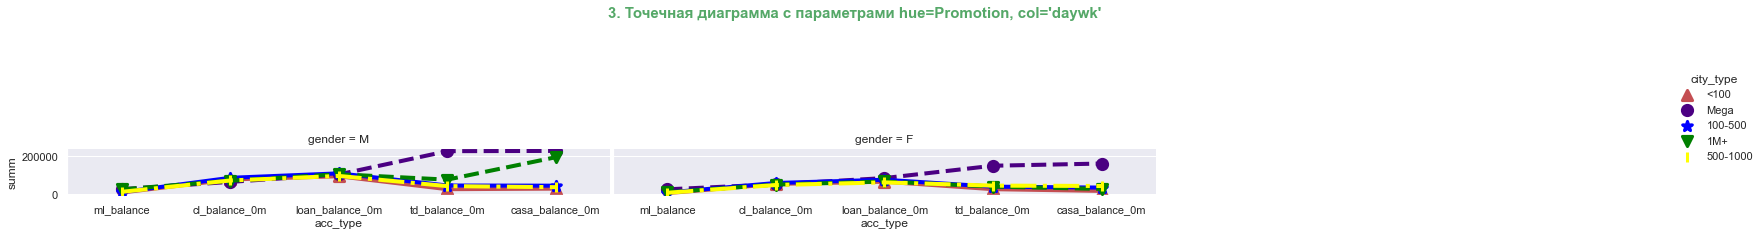

In [67]:
sns.catplot(
    x='acc_type',
    y='summ',
    data=long_dfsum,
    kind='point',
    hue='city_type',
    hue_order=['<100', 'Mega', '100-500', '1M+', '500-1000'],
    palette={"<100": "r", "Mega": "indigo", "100-500": "blue", "1M+": "green", "500-1000": "yellow"},
    markers=["^", "o", "*", "v", "|"],
    linestyles=["-", "--", "solid", "dashed", "dashdot"],
    ci=None,
    col='gender',
    col_wrap=3,
    height=4,
    aspect=2,
    scale=1.5)
plt.suptitle("3. Точечная диаграмма с параметрами hue=city_type, col='gender'", size=15, color='g', weight='bold')
plt.tight_layout(pad=5,w_pad=0.25, h_pad=0.25);

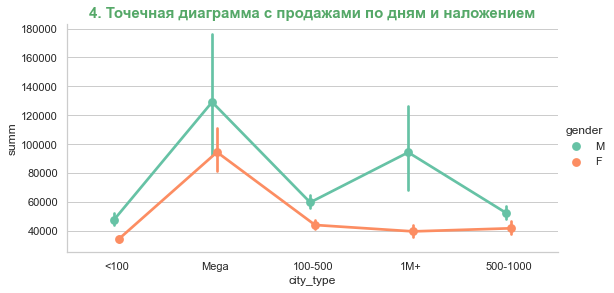

In [79]:
sns.catplot(
    x='city_type',
    y='summ',
    data=long_dfsum,
    kind='point',
    hue='gender',
    dodge=True,
    hue_order=['М','F'],
    palette="Set2",
    order=cnt_city,
    height=4,
    aspect=2)
plt.title('4. Точечная диаграмма с продажами по дням и наложением', size=15, color='g', weight='bold');

In [ ]:
## Диаграммы распределения
- distplot()
- rugplot()
- kdeplot()

C:\Users\MrWind\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MrWind\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


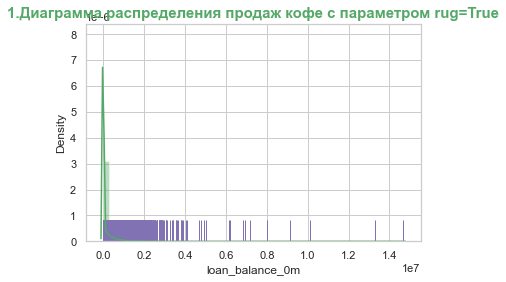

In [72]:
sns.set(style='whitegrid', color_codes=True)

sns.distplot(
    year_dfsum.loan_balance_0m,
    color='g',
    rug=True,
    rug_kws={"color": 'm', "height": 0.1}
)
plt.title('1.Диаграмма распределения кредитов с параметром rug=True', size=15, color='g', weight='bold')
plt.show();

C:\Users\MrWind\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MrWind\anaconda3\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


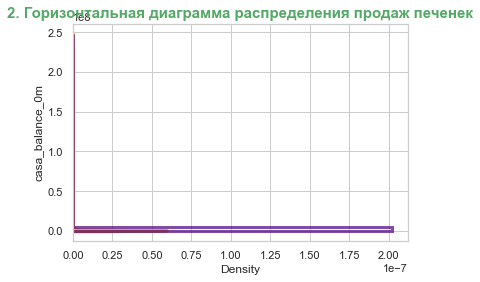

In [73]:
sns.distplot(
    year_dfsum.casa_balance_0m,
    vertical=True,                #hist=False
    hist_kws={"histtype": "step", "linewidth": 3, "alpha": 0.7, "color": "indigo", "label": "Histogram"},
    kde_kws={"shade": True, "color": "orange", "lw": 3, "label": "KDE"})
plt.title('2. Горизонтальная диаграмма распределения счетов клиентов', size=15, color='g', weight='bold')
plt.show();

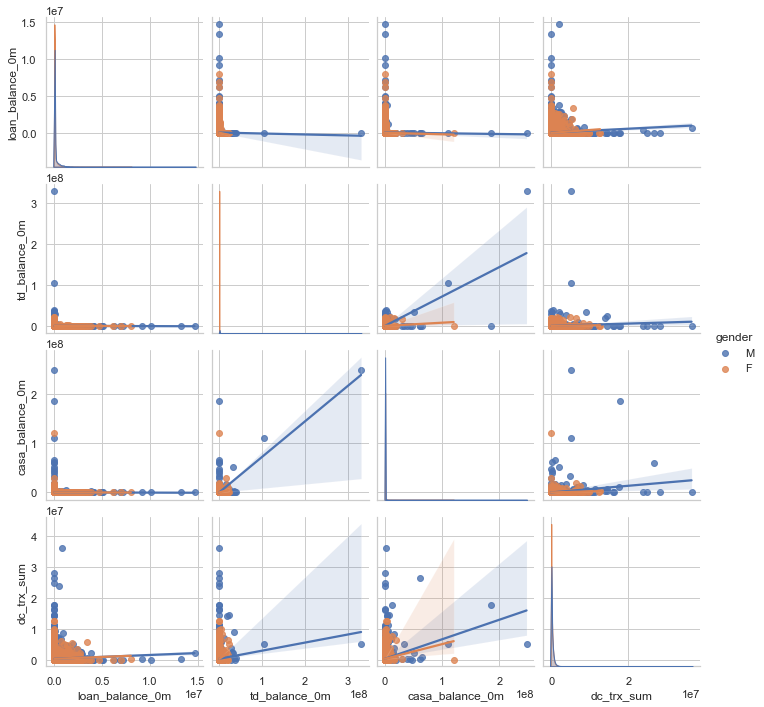

In [74]:
year_dfsum_types = year_dfsum.loc[:,['loan_balance_0m', 'td_balance_0m', 'casa_balance_0m', 'dc_trx_sum','gender']]
sns.pairplot(
    year_dfsum_types,
    hue='gender',
    kind='reg'
)
plt.show();

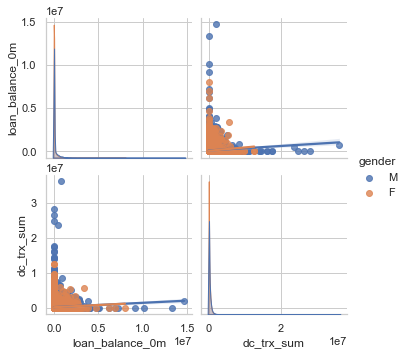

In [76]:
sns.pairplot(
    year_dfsum_types,
    vars=['loan_balance_0m', 'dc_trx_sum'],
    hue='gender', kind='reg')
plt.show();

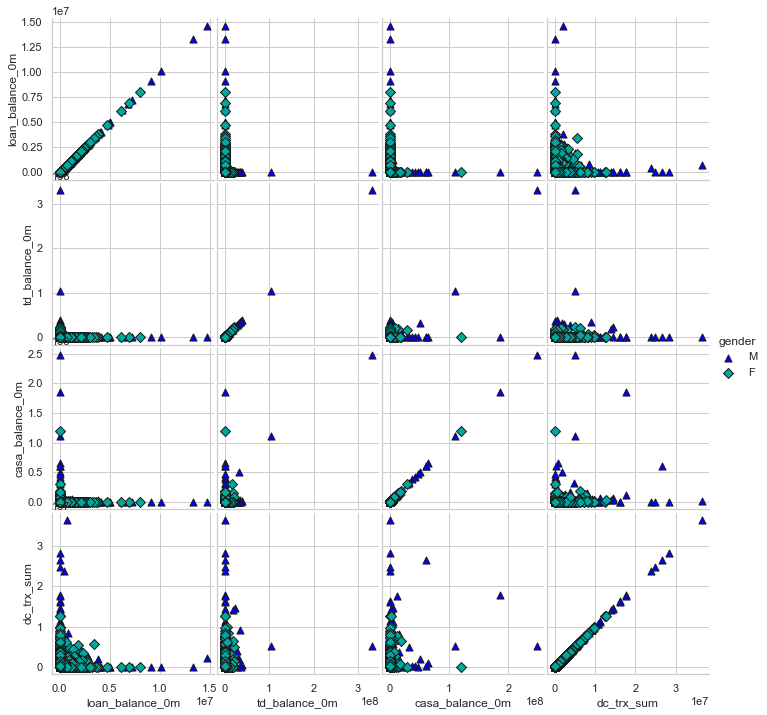

In [78]:
g = sns.PairGrid(
    year_dfsum_types,
    hue='gender',
    hue_kws={"marker": ["^", "D"]},
    palette={'М': 'blue', 'F': '#00a99f05'}
)
g.map(plt.scatter, edgecolor='k', s=50)
g.add_legend()
g.fig.subplots_adjust(wspace=.02, hspace=.02);

In [ ]:
## Матричные диаграммы
- heatmap()
- clustermap()

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')

# Подготовим данные в сводной таблицы по кварталам в строчку и по продуктам в колонках
sales = pd.DataFrame(long_dfsum.groupby(["acc_type", "full_mob"]).summ.mean())
sales = sales.reset_index()
sales = sales.pivot('full_mob','acc_type', 'summ')
sales.head()

acc_type,casa_balance_0m,cl_balance_0m,loan_balance_0m,ml_balance,td_balance_0m
full_mob,,,,,
0,40443.156600,17702.329098,17702.329098,0.0,15062.941176
1,30456.842776,26141.318148,26918.014080,0.0,53136.740678
2,42709.645819,33426.963760,33889.727670,0.0,22168.396770
3,42555.019733,35726.552203,37511.318518,0.0,20030.536013
4,28335.055077,33989.650335,35423.285013,0.0,3592.581727


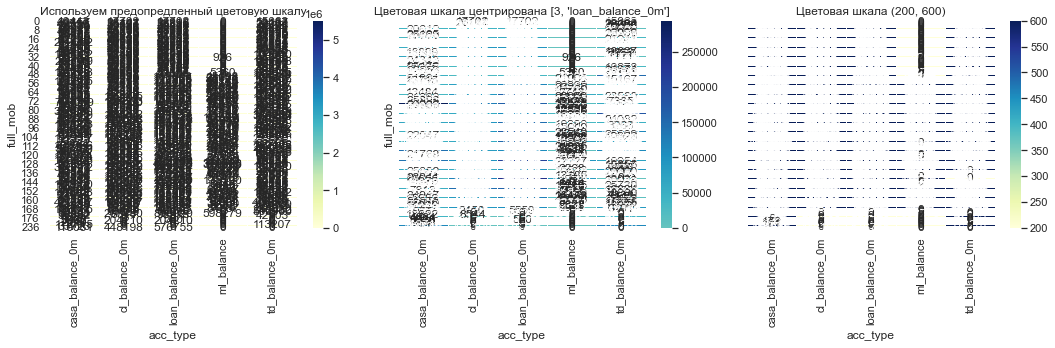

In [86]:
# Set up axes on which to plot various plots
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))

sns.heatmap(
    sales,
    annot=True,
    fmt='.0f',
    linewidths=.5,
    cmap="YlGnBu",
    ax=ax1)
ax1.set_title('Используем предопредленный цветовую шкалу')

sns.heatmap(
    sales,
    annot=True,
    fmt='.0f',
    linewidths=.5,
    robust=True,
    cmap="YlGnBu",
    center=sales.loc[3, 'loan_balance_0m'],
    yticklabels=False,
    ax=ax2)

ax2.set_title("Цветовая шкала центрирована [3, 'loan_balance_0m']")

sns.heatmap(
    sales,
    annot=True,
    fmt='.0f',
    linewidths=.5,
    robust=True,
    vmin=200,
    vmax=600,
    cmap="YlGnBu",
    yticklabels=False,
    ax=ax3)
ax3.set(title='Цветовая шкала (200, 600)', ylabel='')

plt.tight_layout()
plt.show();